In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import sys
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('학습셋 이미지 수 : %d개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

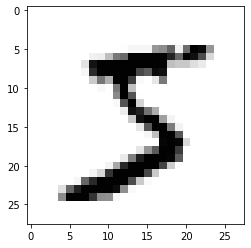

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')

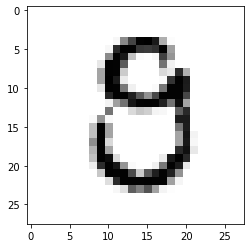

In [7]:
plt.imshow(X_train[80], cmap='Greys')

In [8]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d   '%i)
        
    sys.stdout.write('\n')
    


0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18   18   18   126   136   175   26   166   255   247   127   0   0   0   0   
0   0   0   0   0   0   0   0   30   36   94   154   170   253   253   253   253   253   225   172   253   242   195   64   0   0   0   0   
0   0   0   0   0   0   0   49   238   253   253   253   253   253   253   253   253   251   93   82   82   56   39   0   0   0   0   0   
0   0   0   0   0   0   

In [9]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_train=X_train.astype(float)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0],-1).astype(float)/ 255

In [10]:
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [11]:
print('target : %d ' % (y_train[0]))

target : 5 


In [12]:
print(y_train[0])
print(y_train[1])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])
print(y_train[1])

5
0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30, batch_size=200,\
                   verbose=0, callbacks=[early_stopping_callback,checkpoint])


Epoch 00001: val_loss improved from inf to 0.15235, saving model to ./model\01-0.1524.hdf5

Epoch 00002: val_loss improved from 0.15235 to 0.10084, saving model to ./model\02-0.1008.hdf5

Epoch 00003: val_loss improved from 0.10084 to 0.08720, saving model to ./model\03-0.0872.hdf5

Epoch 00004: val_loss improved from 0.08720 to 0.07041, saving model to ./model\04-0.0704.hdf5

Epoch 00005: val_loss improved from 0.07041 to 0.06731, saving model to ./model\05-0.0673.hdf5

Epoch 00006: val_loss improved from 0.06731 to 0.06186, saving model to ./model\06-0.0619.hdf5

Epoch 00007: val_loss did not improve from 0.06186

Epoch 00008: val_loss improved from 0.06186 to 0.06086, saving model to ./model\08-0.0609.hdf5

Epoch 00009: val_loss did not improve from 0.06086

Epoch 00010: val_loss did not improve from 0.06086

Epoch 00011: val_loss did not improve from 0.06086

Epoch 00012: val_loss did not improve from 0.06086

Epoch 00013: val_loss did not improve from 0.06086

Epoch 00014: val_lo

In [19]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9820

 Test Accuracy: 0.9820


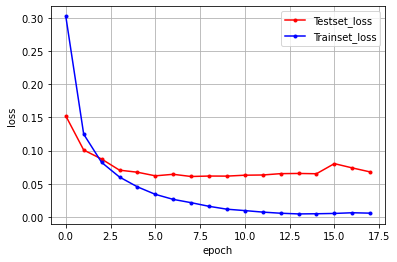

In [20]:
y_vloss = history.history['val_loss'] # test
y_loss = history.history['loss'] # train

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
    
